## Notebook for the Kong 2023 sex covariates identification
### Developed by: Anna Maguza

### Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich

### 4th April 2023

#### Load required packages

In [1]:
import numpy as np
import pandas as pd
import pybiomart as bm
import scanpy as sc

#### Setup Cells

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/anna.maguza/miniconda3/envs/biomart_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


#### Upload Data

In [5]:
#Loading again to further processing
input_Normal_file = '/Users/anna.maguza/Desktop/Data/Gut_project/Healthy_gut_data/Kong_2023/Raw_anndata/adata_Kong_2023_healthy_with_QC.h5ad'  # the file that will store the analysis results
output_Normal_file = '/Users/anna.maguza/Desktop/Data/Gut_project/Healthy_gut_data/Kong_2023/Raw_anndata/adata_Kong_2023_healthy_with_QC_output.h5ad'  # the file that will store the analysis results

In [6]:
#Anndata upload
adata = sc.read_h5ad(input_Normal_file)
adata.X

<181806x27830 sparse matrix of type '<class 'numpy.float32'>'
	with 183633885 stored elements in Compressed Sparse Row format>

In [7]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [8]:
annot.head()

,ensembl_gene_id,start_position,end_position,chromosome_name
external_gene_name,,,,
MT-TF,ENSG00000210049,577,647,MT
MT-RNR1,ENSG00000211459,648,1601,MT
MT-TV,ENSG00000210077,1602,1670,MT
MT-RNR2,ENSG00000210082,1671,3229,MT
MT-TL1,ENSG00000209082,3230,3304,MT


In [9]:
chrY_genes = adata.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Y_RNA', 'ZFY', 'PCDH11Y', 'RPS4Y1', 'ZFY-AS1', 'LINC00278', 'USP9Y',
       'DDX3Y', 'UTY', 'TMSB4Y', 'TTTY14', 'KDM5D', 'EIF1AY', 'RPS4Y2',
       'TBL1Y', 'NLGN4Y', 'TTTY10', 'SRY', 'TTTY7', 'FAM224B', 'FAM224A',
       'AMELY'],
      dtype='object')

In [11]:
adata.var_names.str.match('XIST')

array([False, False, False, ..., False, False, False])

In [36]:
chrY_sum = adata[:, chrY_genes].X.sum(axis=1)
total_sum = adata.X.sum(axis=1)

# Flatten the arrays and calculate percent_chrY
adata.obs['percent_chrY'] = (np.asarray(chrY_sum).flatten() / np.asarray(total_sum).flatten()) * 100

In [18]:
adata.obs["XIST-counts"] = adata.X[:, adata.var_names.str.match('XIST')].toarray().squeeze()

In [22]:
adata.obs

,cell_type,tissue,batch,biosample_id,n_genes,n_counts,Chem,Site,Type,donor_id,...,pct_counts_mito,total_counts_ribo,pct_counts_ribo,S_score,G2M_score,doublet_scores,predicted_doublets,doublet_info,percent_chrY,XIST-counts
cell_id,,,,,,,,,,,,,,,,,,,,,
H197396_N1-TCAGCAATCTTTACGT,Stromal,Colon,0,H197396_N1,2635,10265,v2,CO,Heal,197396,...,2.903069,1798.0,17.515831,-0.406440,-0.879551,0.021071,False,False,0.049668,0.0
H197396_N1-GTAGGCCTCTTCATGT,Stromal,Colon,0,H197396_N1,2559,8477,v2,CO,Heal,197396,...,7.349298,1685.0,19.877316,0.009198,-0.620149,0.043100,False,False,0.082134,0.0
H197396_N1-GAGTCCGTCTTTAGGG,Stromal,Colon,0,H197396_N1,2334,7392,v2,CO,Heal,197396,...,7.278138,1367.0,18.492966,0.066148,-0.648882,0.041815,False,False,0.053381,0.0
H197396_N1-TGTGTTTCAACAACCT,Stromal,Colon,0,H197396_N1,2320,7314,v2,CO,Heal,197396,...,7.820618,1455.0,19.893356,0.009155,-0.705645,0.027460,False,False,0.132729,0.0
H197396_N1-CATCGGGGTAGCACGA,Stromal,Colon,0,H197396_N1,2234,6959,v2,CO,Heal,197396,...,10.173876,1309.0,18.810173,-0.181677,-0.590985,0.058013,False,False,0.094285,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H180844_N4-GATCGATCATATACGC,Immune,Terminal Ileum,5,H180844_N4,101,228,v2,TI,Heal,180844,...,9.649122,29.0,12.719299,-0.037082,-0.037010,0.057673,False,False,0.000000,0.0
H180844_N4-ACTGCTCAGAAACCTA,Immune,Terminal Ileum,5,H180844_N4,221,310,v2,TI,Heal,180844,...,2.580645,88.0,28.387096,-0.016662,1.175464,0.067636,False,False,0.443000,0.0
H180844_N4-CATCAGACACGGCCAT,Immune,Terminal Ileum,5,H180844_N4,204,306,v2,TI,Heal,180844,...,4.575163,66.0,21.568628,-0.033933,-0.136814,0.016122,False,False,0.000000,0.0


In [23]:
print("Length of XIST-counts:", len(adata.obs["XIST-counts"]))

Length of XIST-counts: 181806


In [24]:
print("Length of percent_chrY:", len(adata.obs["percent_chrY"]))

Length of percent_chrY: 181806


In [28]:
print("Length of biosample_id:", len(adata.obs["biosample_id"]))

Length of biosample_id: 181806


In [30]:
adata.obs["biosample_id"].value_counts()

H102141_E     10167
H180844_N3     9769
H197396_N1     9306
N51_LP_A       7258
H158108_N1     6529
              ...  
H158160_E       242
H101694_E       137
N8_Epi_B        131
H158160_L       106
H157844_E        44
Name: biosample_id, Length: 75, dtype: int64

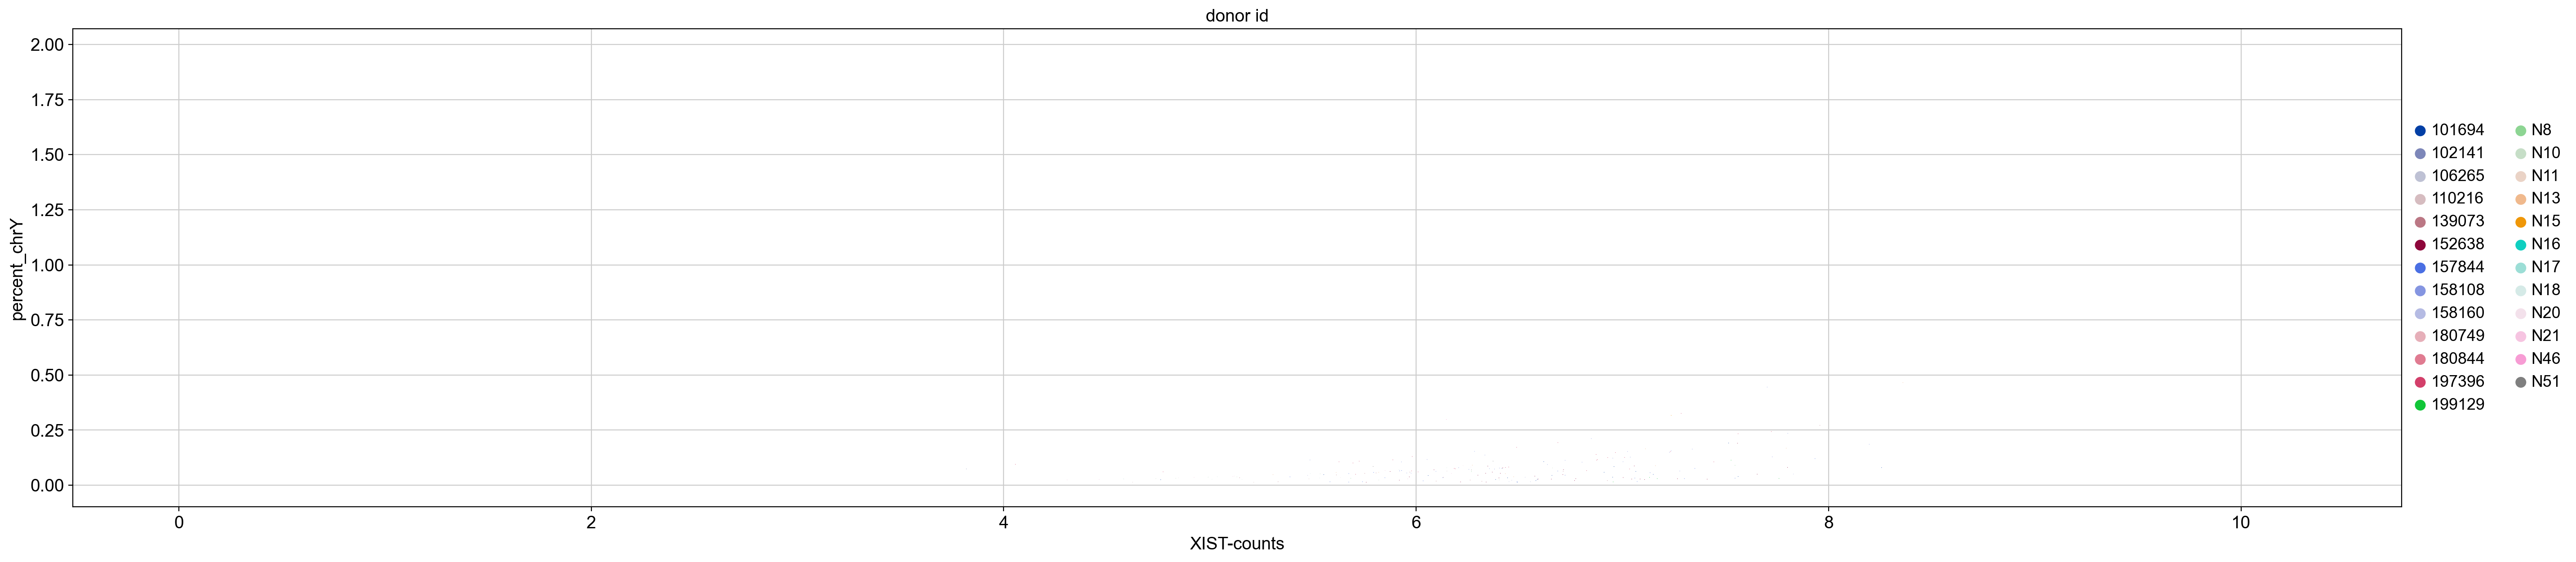

In [43]:
sc.pl.scatter(adata, x = 'XIST-counts', y = 'percent_chrY', color = "donor_id")

In [45]:
adata.obs["donor_id"].value_counts()

197396    23499
180844    21053
N10       15838
158108    14123
N51       13508
102141    12430
N46        9732
N15        8900
N18        7202
N20        6563
N21        5762
N17        5421
N11        5411
N13        5300
139073     4397
N16        4289
152638     3631
101694     3535
110216     2609
106265     2101
N8         2011
157844     1546
180749     1375
199129     1222
158160      348
Name: donor_id, dtype: int64

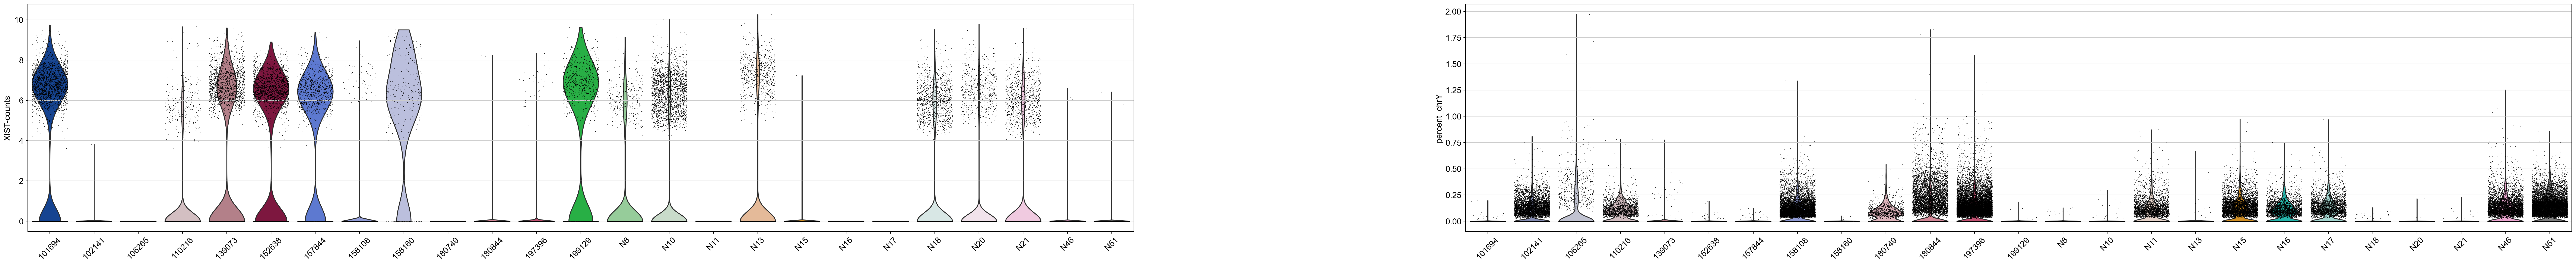

In [42]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(adata, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'donor_id', rotation = 45)

In [50]:
# Add 'Female' to sex column in adata.obs for donor_id= 101694 , 110216 , 139073 , 152638 , 157844 , 158160 , 199129 , N8 , N10 , N13, N18 , N20 , N21
female_donors = ['101694', '110216', '139073', '152638', '157844', '158160', '199129', 'N8', 'N10', 'N13', 'N18', 'N20', 'N21']

adata.obs['sex'] = ['female' if donor in female_donors else 'male' for donor in adata.obs['donor_id']]

In [55]:
adata.obs['sex'].value_counts()

male      121842
female     59964
Name: sex, dtype: int64

In [56]:
#save the file
adata.write(input_Normal_file)